## Questão 4 

In [2]:
import pandas as pd

In [46]:
frutas = pd.read_csv('fruit_data_with_colors_miss.txt',sep='\t',na_values=['.','?'])

In [47]:
frutas[:10]

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.0,8.4,7.3,0.55
1,1,apple,granny_smith,180.0,8.0,6.8,0.59
2,1,apple,granny_smith,176.0,7.4,7.2,0.60
3,2,mandarin,mandarin,NaN,6.2,4.7,0.80
4,2,mandarin,mandarin,84.0,6.0,4.6,0.79
5,2,mandarin,mandarin,80.0,5.8,4.3,0.77
6,2,mandarin,mandarin,80.0,5.9,4.3,0.81
7,2,mandarin,NaN,76.0,5.8,4.0,0.81
8,1,apple,braeburn,178.0,7.1,NaN,0.92
9,1,apple,braeburn,172.0,7.4,7.0,0.89


In [48]:
frutas.isnull().any()

fruit_label      False
fruit_name       False
fruit_subtype     True
mass              True
width            False
height            True
color_score      False
dtype: bool

In [49]:
frutas['mass'].fillna(frutas['mass'].mean(), inplace=True)
frutas['height'].fillna(frutas['height'].mean(), inplace=True)

In [50]:
frutas[:10]

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.000000,8.4,7.300000,0.55
1,1,apple,granny_smith,180.000000,8.0,6.800000,0.59
2,1,apple,granny_smith,176.000000,7.4,7.200000,0.60
3,2,mandarin,mandarin,164.448276,6.2,4.700000,0.80
4,2,mandarin,mandarin,84.000000,6.0,4.600000,0.79
5,2,mandarin,mandarin,80.000000,5.8,4.300000,0.77
6,2,mandarin,mandarin,80.000000,5.9,4.300000,0.81
7,2,mandarin,NaN,76.000000,5.8,4.000000,0.81
8,1,apple,braeburn,178.000000,7.1,7.691379,0.92
9,1,apple,braeburn,172.000000,7.4,7.000000,0.89


In [7]:
import matplotlib.pyplot as plt

In [14]:
from sklearn.model_selection import train_test_split

In [51]:
X = frutas[['mass','width','height','color_score']]
y = frutas['fruit_label']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    print(knn.score(X_train,y_train))

1.0
0.75
0.75
0.75
0.7045454545454546
0.7045454545454546
0.6818181818181818
0.6818181818181818
0.6818181818181818


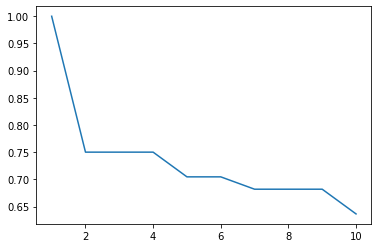

In [54]:
scores = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_train,y_train))
plt.plot(range(1,11),scores)
plt.show()

In [55]:
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    print(knn.score(X_test,y_test))


0.8
0.5333333333333333
0.4666666666666667
0.5333333333333333
0.3333333333333333
0.3333333333333333
0.26666666666666666
0.4
0.3333333333333333


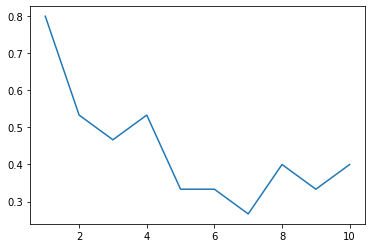

In [56]:
scores = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))
plt.plot(range(1,11),scores)
plt.show()

Justificativa das diferenças:
Verificou-se que quanto maior o valor de neighbons, pior é o índice de acertividade.
Essa conclusão é observada tanto no treino como no teste.
Conclui-se tambem, que existe um ponto ideal em cada experimento; enquanto que no teste, o grau de maior acertividade ocorreu com o valor de neighborn entre 2 e 4, no treino, esse índice de maior acertividade ocorreu com o valor de neighborn entre 1 e 4, sendo que o 1 se destaca.